<a href="https://colab.research.google.com/github/veranery/desafio_alura_dados_educacionais/blob/main/desafio_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
pip install basedosdados

In [181]:
import pandas as pd
import geopandas as gpd
import basedosdados as bd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
import basedosdados as bd

# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_inep_saeb',
table_id='brasil',
billing_project_id="analise-de-dados-educacionais")
dados = df

Downloading: 100%|██████████| 1124/1124 [00:00<00:00, 4175.25rows/s]


In [183]:
dados

,ano,rede,localizacao,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,2019,estadual,total,LP,2,751.222766,4.602618,3.951387,5.985628,11.485410,17.949120,22.248559,18.728565,10.458310,4.590403,NaN,NaN
1,2019,federal,total,LP,2,777.844695,1.193606,0.402326,1.581318,3.762806,12.182706,25.344901,28.774909,15.366830,11.390597,NaN,NaN
2,2019,municipal,total,LP,2,741.635071,5.876650,5.299290,8.367580,13.820993,19.199500,20.724740,15.950030,7.151382,3.609836,NaN,NaN
3,2019,privada,total,LP,2,775.639175,0.636825,0.968077,1.990333,6.087452,13.279804,23.714790,25.898868,17.564209,9.859642,NaN,NaN
4,2019,total - estadual e municipal,total,LP,2,743.254884,5.661406,5.071565,7.965156,13.426403,18.988252,20.982185,16.419455,7.710078,3.775500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,2021,Total - Estadual e Municipal,Urbana,LP,2,716.420000,16.490000,11.080000,12.060000,14.560000,14.090000,13.220000,11.190000,5.710000,1.600000,NaN,NaN
1120,2021,Total - Estadual e Municipal,Rural,LP,2,708.370000,24.080000,8.890000,11.090000,11.530000,15.320000,13.600000,9.150000,4.990000,1.340000,NaN,NaN
1121,2021,"Total - Federal, Estadual e Municipal",Total,LP,2,715.640000,17.250000,10.850000,11.960000,14.250000,14.220000,13.260000,10.990000,5.640000,1.580000,NaN,NaN
1122,2021,"Total - Federal, Estadual e Municipal",Urbana,LP,2,716.460000,16.480000,11.070000,12.060000,14.550000,14.090000,13.220000,11.200000,5.720000,1.610000,NaN,NaN


In [184]:
dados.isnull() # tratando valores nulos

,ano,rede,localizacao,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1120,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1121,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1122,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [185]:
dados.isnull().sum()

ano              0
rede             0
localizacao      0
disciplina       0
serie            0
media          437
nivel_0        430
nivel_1        430
nivel_2        430
nivel_3        430
nivel_4        430
nivel_5        430
nivel_6        430
nivel_7        430
nivel_8        430
nivel_9        711
nivel_10       897
dtype: int64

In [186]:
dados = dados.fillna(0)
dados


,ano,rede,localizacao,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,2019,estadual,total,LP,2,751.222766,4.602618,3.951387,5.985628,11.485410,17.949120,22.248559,18.728565,10.458310,4.590403,0.0,0.0
1,2019,federal,total,LP,2,777.844695,1.193606,0.402326,1.581318,3.762806,12.182706,25.344901,28.774909,15.366830,11.390597,0.0,0.0
2,2019,municipal,total,LP,2,741.635071,5.876650,5.299290,8.367580,13.820993,19.199500,20.724740,15.950030,7.151382,3.609836,0.0,0.0
3,2019,privada,total,LP,2,775.639175,0.636825,0.968077,1.990333,6.087452,13.279804,23.714790,25.898868,17.564209,9.859642,0.0,0.0
4,2019,total - estadual e municipal,total,LP,2,743.254884,5.661406,5.071565,7.965156,13.426403,18.988252,20.982185,16.419455,7.710078,3.775500,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,2021,Total - Estadual e Municipal,Urbana,LP,2,716.420000,16.490000,11.080000,12.060000,14.560000,14.090000,13.220000,11.190000,5.710000,1.600000,0.0,0.0
1120,2021,Total - Estadual e Municipal,Rural,LP,2,708.370000,24.080000,8.890000,11.090000,11.530000,15.320000,13.600000,9.150000,4.990000,1.340000,0.0,0.0
1121,2021,"Total - Federal, Estadual e Municipal",Total,LP,2,715.640000,17.250000,10.850000,11.960000,14.250000,14.220000,13.260000,10.990000,5.640000,1.580000,0.0,0.0
1122,2021,"Total - Federal, Estadual e Municipal",Urbana,LP,2,716.460000,16.480000,11.070000,12.060000,14.550000,14.090000,13.220000,11.200000,5.720000,1.610000,0.0,0.0


In [187]:
dados_ao_longo_tempo = dados[['ano', 'media']]


In [188]:
#Retirando da base de dados os valores totais de cada ano, deixando os valores unicos
dados.rede.unique()

array(['estadual', 'federal', 'municipal', 'privada',
       'total - estadual e municipal',
       'total - federal, estadual e municipal',
       'total - federal, estadual, municipal e privada',
       'Total - Federal, Estadual, Municipal e Privada', 'Federal',
       'Estadual', 'Municipal', 'Privada', 'Total - Estadual e Municipal',
       'Total - Federal, Estadual e Municipal'], dtype=object)

In [189]:
dados_rede = ['total - estadual e municipal',
       'total - federal, estadual e municipal',
       'total - federal, estadual, municipal e privada',
       'Total - Federal, Estadual, Municipal e Privada', 'Federal', 'Total - Estadual e Municipal',
       'Total - Federal, Estadual e Municipal']


In [196]:
resultado_filtrado_redes = dados[~dados['rede'].isin(dados_rede)]
resultado_filtrado_redes

,ano,rede,localizacao,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,2019,estadual,total,LP,2,751.222766,4.602618,3.951387,5.985628,11.485410,17.949120,22.248559,18.728565,10.458310,4.590403,0.0,0.0
1,2019,federal,total,LP,2,777.844695,1.193606,0.402326,1.581318,3.762806,12.182706,25.344901,28.774909,15.366830,11.390597,0.0,0.0
2,2019,municipal,total,LP,2,741.635071,5.876650,5.299290,8.367580,13.820993,19.199500,20.724740,15.950030,7.151382,3.609836,0.0,0.0
3,2019,privada,total,LP,2,775.639175,0.636825,0.968077,1.990333,6.087452,13.279804,23.714790,25.898868,17.564209,9.859642,0.0,0.0
7,2019,estadual,total,MT,2,753.551323,2.353872,3.727819,7.721613,13.576381,19.691037,18.773344,15.290268,11.379596,7.486069,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,2021,Municipal,Urbana,LP,2,714.700000,17.250000,11.290000,12.010000,14.870000,14.250000,12.790000,10.580000,5.460000,1.490000,0.0,0.0
1114,2021,Municipal,Rural,LP,2,707.600000,24.640000,8.860000,11.080000,11.540000,15.170000,13.570000,8.860000,4.980000,1.290000,0.0,0.0
1115,2021,Privada,Total,LP,2,772.400000,1.150000,1.380000,2.100000,7.750000,13.730000,24.090000,24.500000,15.570000,9.710000,0.0,0.0
1116,2021,Privada,Urbana,LP,2,772.430000,1.150000,1.390000,2.090000,7.700000,13.740000,24.130000,24.570000,15.530000,9.710000,0.0,0.0


In [204]:
#foi necessário retirar a localizacao total dos dados de 2021, pois esses dados
#encontravam duplicados. Existia os dados 'urbanos', 'rurais' e 'totais, sendo
#os dados totais a soma dos outros dois.
resultado_filtrado_redes = resultado_filtrado_redes.loc[~((resultado_filtrado_redes['ano'] == 2021) & (resultado_filtrado_redes['localizacao'] == 'total')& (resultado_filtrado_redes['localizacao'] == 'Total'))]
resultado_filtrado_redes


,ano,rede,localizacao,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,2019,estadual,total,LP,2,751.222766,4.602618,3.951387,5.985628,11.485410,17.949120,22.248559,18.728565,10.458310,4.590403,0.0,0.0
1,2019,federal,total,LP,2,777.844695,1.193606,0.402326,1.581318,3.762806,12.182706,25.344901,28.774909,15.366830,11.390597,0.0,0.0
2,2019,municipal,total,LP,2,741.635071,5.876650,5.299290,8.367580,13.820993,19.199500,20.724740,15.950030,7.151382,3.609836,0.0,0.0
3,2019,privada,total,LP,2,775.639175,0.636825,0.968077,1.990333,6.087452,13.279804,23.714790,25.898868,17.564209,9.859642,0.0,0.0
7,2019,estadual,total,MT,2,753.551323,2.353872,3.727819,7.721613,13.576381,19.691037,18.773344,15.290268,11.379596,7.486069,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,2021,Municipal,Urbana,LP,2,714.700000,17.250000,11.290000,12.010000,14.870000,14.250000,12.790000,10.580000,5.460000,1.490000,0.0,0.0
1114,2021,Municipal,Rural,LP,2,707.600000,24.640000,8.860000,11.080000,11.540000,15.170000,13.570000,8.860000,4.980000,1.290000,0.0,0.0
1115,2021,Privada,Total,LP,2,772.400000,1.150000,1.380000,2.100000,7.750000,13.730000,24.090000,24.500000,15.570000,9.710000,0.0,0.0
1116,2021,Privada,Urbana,LP,2,772.430000,1.150000,1.390000,2.090000,7.700000,13.740000,24.130000,24.570000,15.530000,9.710000,0.0,0.0


In [205]:
ordem_maior_media = resultado_filtrado_redes.sort_values(by='media', ascending=False) #ordenando as media em ordem crescente
ordem_maior_media

,ano,rede,localizacao,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
1,2019,federal,total,LP,2,777.844695,1.193606,0.402326,1.581318,3.762806,12.182706,25.344901,28.774909,15.366830,11.390597,0.0,0.0
8,2019,federal,total,MT,2,777.500857,0.777419,1.204929,2.164175,7.794489,14.556051,18.520092,21.635998,18.328005,15.018843,0.0,0.0
3,2019,privada,total,LP,2,775.639175,0.636825,0.968077,1.990333,6.087452,13.279804,23.714790,25.898868,17.564209,9.859642,0.0,0.0
1097,2021,Privada,Rural,MT,2,773.480000,0.100000,1.550000,5.260000,8.540000,15.630000,24.780000,13.320000,10.220000,20.600000,0.0,0.0
10,2019,privada,total,MT,2,772.876183,0.365042,1.294554,3.590991,9.331127,16.194810,19.704380,19.885563,17.342228,12.291304,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,2005,estadual,total,MT,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
651,2003,privada,total,MT,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
650,2003,municipal,total,MT,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
649,2003,federal,total,MT,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


###Desafio - Embarque em uma máquina do tempo e descubra como o desempenho dos estudantes mudou ao longo dos anos. Estamos melhorando ou regredindo?

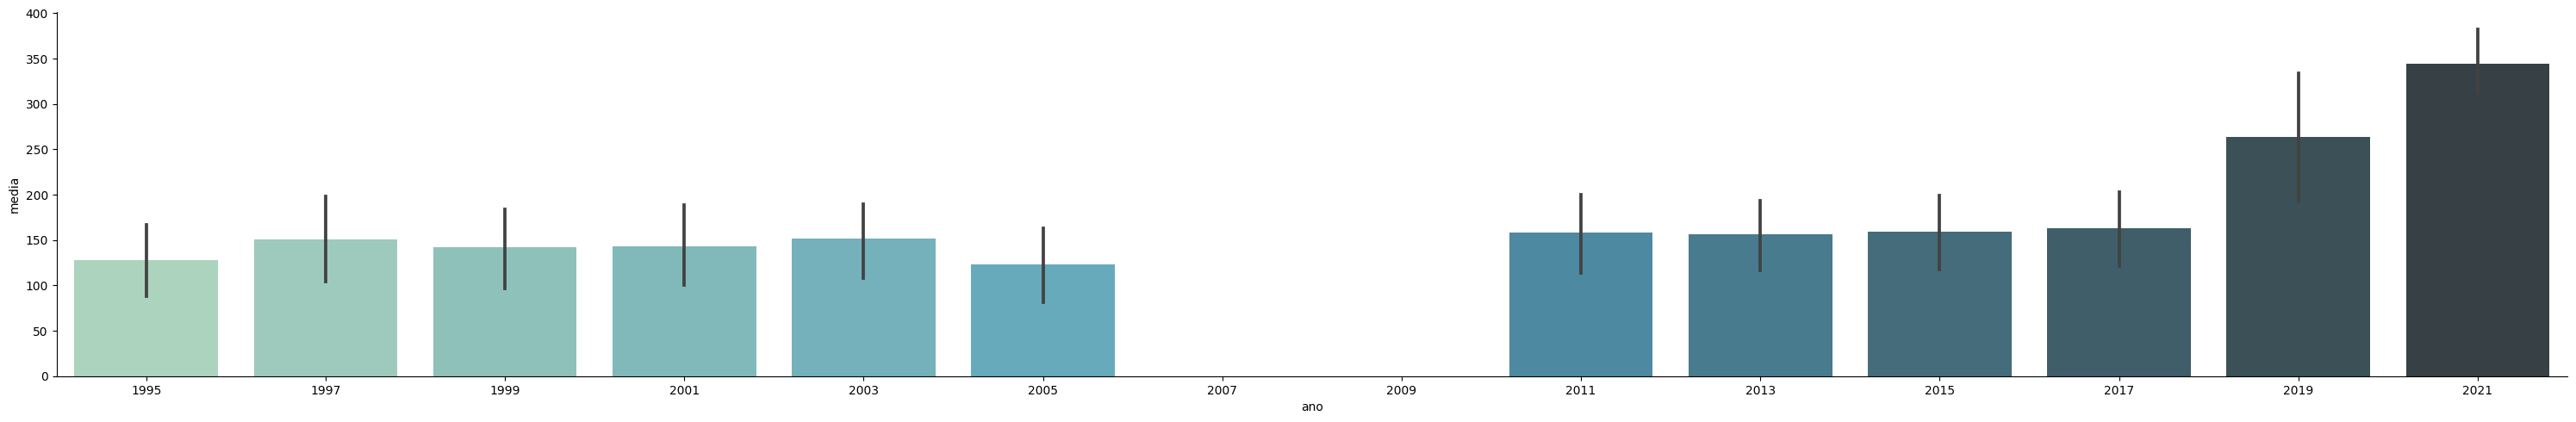

In [206]:
#dados_ao_longo_tempo.plot(kind='barh', figsize=(50, 25), color='purple')
sns.catplot(x = 'ano', y = "media", kind= "bar", data = ordem_maior_media, aspect = 6,
    palette = "GnBu_d")

###Ao analisar o gráfico, percebemos uma relativa estabilidade ao longo dos anos, com uma ressalva para os anos de 2019 e 2021. Nestes dois últimos anos, notamos um incremento na média tanto para as redes privadas quanto públicas. Contudo, é prudente destacar que a disponibilidade de dados pode não ser suficiente para sustentar a alegação de uma mudança substancial e significativa.Essas variações podem ser atribuídas à transição para provas online e à obrigatoriedade do teste para todas as escolas a partir de 2021.Outro ponto a ser levado em consideração é a proposta de calcular a média ao longo de três anos, substituindo o Enem em 2024, sugere uma estratégia avaliativa mais abrangente.

###Desafio - Qual disciplina reina suprema? Quem tem os melhores magos da matemática e os mestres da língua ou outros poderes?


In [207]:
#juntando disciplina e média
dados_disci_nota = dados[['disciplina', 'media']]
ordem_maior_media_disciplina = dados_disci_nota.sort_values(by='media', ascending=False) #ordenando as media em ordem crescente


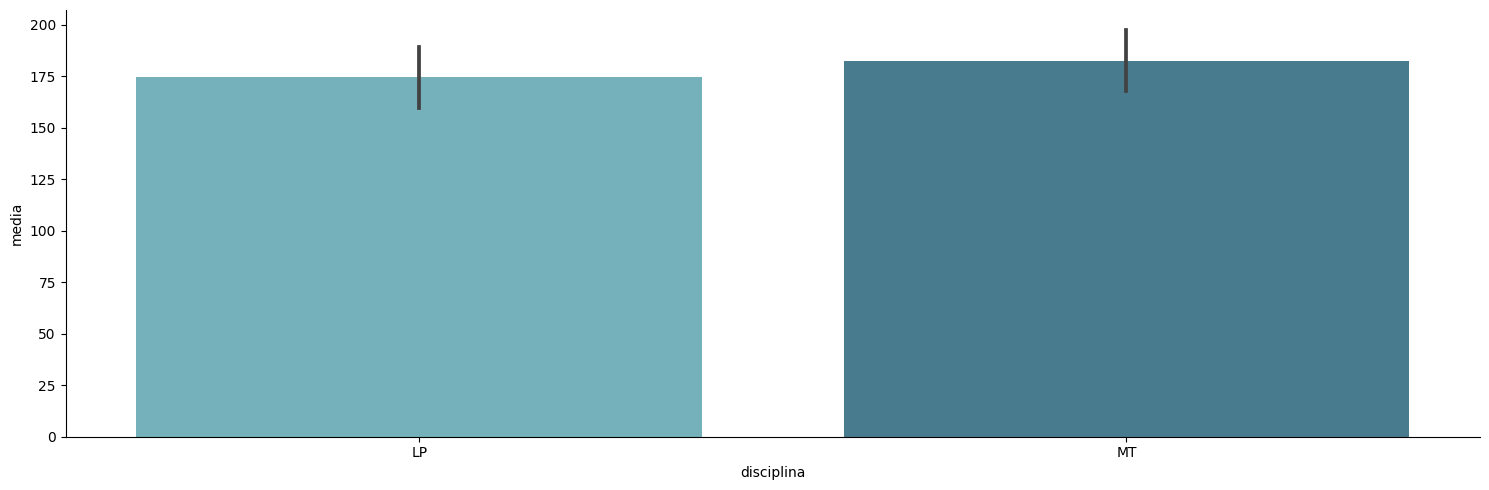

In [208]:
#visualizando a media das notas em LP e MT
sns.catplot(x = 'disciplina', y = "media", kind= "bar", data = ordem_maior_media_disciplina, aspect = 3,
    palette = "GnBu_d")

In [210]:
#separando as notas de MT e fazendo a média
dados_disci_MT = dados_disci_nota.query("disciplina == 'MT'")

dados_disci_media_MT = dados_disci_MT.mean()
dados_disci_media_MT

media    182.618511
dtype: float64

In [211]:
#Resultado da mediana
dados_disci_mediana_MT = dados_disci_MT.median()
dados_disci_mediana_MT

media    222.355995
dtype: float64

In [212]:
#separando as notas de LP e fazendo a média

dados_disci_LP = dados_disci_nota.query("disciplina == 'LP'")
dados_disci_media_LP = dados_disci_LP.mean()
dados_disci_media_LP

media    174.742075
dtype: float64

In [213]:
#Resultado mediana
dados_disci_mediana_LP = dados_disci_LP.median()
dados_disci_mediana_LP

media    209.05206
dtype: float64

Nos dois casos, a média (174,74) é menor que a mediana (209,05). Isso indica que a distribuição dos dados é assimétrica, com uma cauda mais longa à esquerda. Isso significa que há mais valores baixos do que altos. A melhor explicação é que haja outliers (valores extremos) na cauda esquerda da distribuição. Esses outliers podem estar distorcendo a média, fazendo com que ela pareça menor do que a mediana.



In [214]:
dados_disci_LP = dados.query("disciplina == 'LP'")
notas_LP = dados_disci_LP['media']

In [215]:
dados_disci_MT = dados.query("disciplina == 'MT'")
notas_matematica = dados_disci_MT['media']


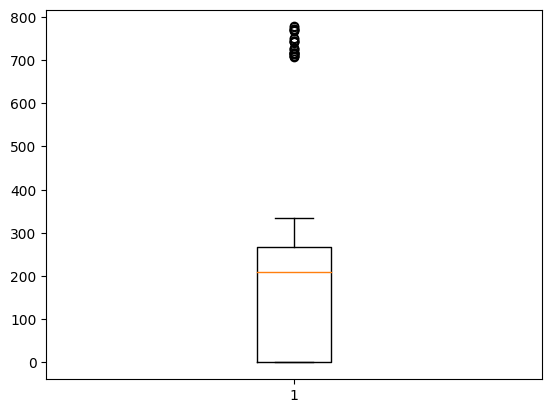

In [216]:
# Fazendo um boxplot para entender melhor a distribuiçao dos dados. E com o boxplot podemos confimar a existencia de outliers.
import matplotlib.pyplot as plt

plt.boxplot(notas_LP)
plt.show()


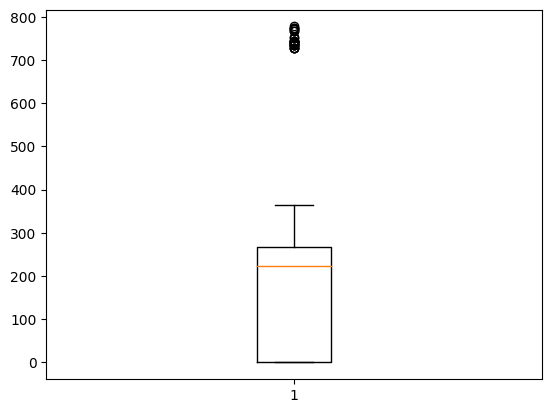

In [217]:
import matplotlib.pyplot as plt

plt.boxplot(notas_matematica)
plt.show()


In [218]:
#teste de shapiro para verificar se os dados são paramétricos
import scipy.stats as stats

w_matematica, p_matematica = stats.shapiro(notas_matematica)
w_portugues, p_portugues = stats.shapiro(notas_LP)

print(w_matematica, p_matematica)
print(w_portugues, p_portugues)


0.7910552620887756 3.1120799985538064e-26
0.7841070890426636 1.339611387697652e-26


Os valores de w para ambas as notas de matemática e português (0.791 e 0.784) estão abaixo de 0.9, o que geralmente indica que os dados não seguem uma distribuição normal.
Os valores de p para ambas as notas são extremamente pequenos (3.112e-26 e 1.339e-26), reforçando a conclusão de que a hipótese nula de normalidade é rejeitada.
Por essa razao, o teste Mann-Whitney sera feito.

In [219]:
#teste mannwhitney p
import scipy.stats as stats

mt, lp = stats.mannwhitneyu(notas_matematica, notas_LP)

print(mt, lp)


163614.0 0.28099190844876887


A análise de distribuição dos dados mostrou que as notas de matemática e português não seguem uma distribuição normal. O teste de Mann-Whitney também não detectou diferença significativa entre as notas das duas matérias. Portanto, não é possível afirmar que uma matéria é superior à outra.

Outra observação importante é a presença de outliers nos dados. Esses valores extremos podem indicar discrepâncias no ensino brasileiro, como, por exemplo, a existência de alunos com notas muito altas ou muito baixas em comparação com a média.

### Atividade Extra: Qual a diferença entre as notas de escolas públicas e privadas

###Desafio - Viaje pelo Brasil e descubra quais estados contêm os tesouros do alto desempenho e quais enfrentam os desafios do baixo rendimento.

In [220]:
df = bd.read_table(dataset_id='br_inep_saeb',
table_id='uf',
billing_project_id="analise-de-dados-educacionais")
dados_uf = df

Downloading: 100%|██████████| 31790/31790 [00:02<00:00, 12237.40rows/s]


In [221]:
dados_uf

,ano,rede,localizacao,sigla_uf,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,2019,estadual,total,AC,LP,2,747.760467,3.790086,3.561181,5.804402,13.526525,22.718090,21.779175,18.067362,6.290844,4.462335,NaN,NaN
1,2019,federal,total,AC,LP,2,777.825373,0.000000,0.000000,4.761905,0.000000,9.523810,28.571429,42.857143,9.523810,4.761905,NaN,NaN
2,2019,municipal,total,AC,LP,2,738.481064,4.812075,4.938118,7.416916,16.427986,22.910232,22.457441,14.914972,4.674572,1.447689,NaN,NaN
3,2019,privada,total,AC,LP,2,779.609795,1.112791,0.964419,1.520814,3.746395,12.600819,23.719963,25.087001,16.977795,14.270004,NaN,NaN
4,2019,total - estadual e municipal,total,AC,LP,2,742.568840,4.361867,4.331548,6.706569,15.149830,22.825590,22.158650,16.303667,5.386574,2.775705,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31785,2021,Total - Estadual e Municipal,Urbana,TO,LP,2,691.560000,25.190000,13.700000,16.000000,19.490000,16.010000,5.060000,3.860000,0.590000,0.100000,NaN,NaN
31786,2021,Total - Estadual e Municipal,Rural,TO,LP,2,676.140000,42.870000,17.180000,7.170000,16.350000,7.090000,6.480000,1.910000,0.450000,0.490000,NaN,NaN
31787,2021,"Total - Federal, Estadual e Municipal",Total,TO,LP,2,690.700000,26.170000,13.890000,15.510000,19.310000,15.510000,5.140000,3.750000,0.580000,0.120000,NaN,NaN
31788,2021,"Total - Federal, Estadual e Municipal",Urbana,TO,LP,2,691.560000,25.190000,13.700000,16.000000,19.490000,16.010000,5.060000,3.860000,0.590000,0.100000,NaN,NaN


In [222]:
dados_rede_uf = ['total - estadual e municipal',
       'total - federal, estadual e municipal',
       'total - federal, estadual, municipal e privada',
       'Total - Federal, Estadual, Municipal e Privada', 'Federal', 'Total - Estadual e Municipal',
       'Total - Federal, Estadual e Municipal']

In [223]:
resultado_filtrado_uf = dados_uf[~dados_uf['rede'].isin(dados_rede)]
resultado_filtrado_uf

,ano,rede,localizacao,sigla_uf,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,2019,estadual,total,AC,LP,2,747.760467,3.790086,3.561181,5.804402,13.526525,22.718090,21.779175,18.067362,6.290844,4.462335,NaN,NaN
1,2019,federal,total,AC,LP,2,777.825373,0.000000,0.000000,4.761905,0.000000,9.523810,28.571429,42.857143,9.523810,4.761905,NaN,NaN
2,2019,municipal,total,AC,LP,2,738.481064,4.812075,4.938118,7.416916,16.427986,22.910232,22.457441,14.914972,4.674572,1.447689,NaN,NaN
3,2019,privada,total,AC,LP,2,779.609795,1.112791,0.964419,1.520814,3.746395,12.600819,23.719963,25.087001,16.977795,14.270004,NaN,NaN
7,2019,estadual,total,AL,LP,2,718.882757,9.874490,7.644338,15.184035,19.124725,21.892096,14.976919,7.778167,3.195372,0.329857,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31779,2021,Municipal,Urbana,TO,LP,2,690.620000,25.570000,13.850000,16.190000,19.540000,15.910000,4.780000,3.630000,0.450000,0.080000,NaN,NaN
31780,2021,Municipal,Rural,TO,LP,2,676.140000,42.870000,17.180000,7.170000,16.350000,7.090000,6.480000,1.910000,0.450000,0.490000,NaN,NaN
31781,2021,Privada,Total,TO,LP,2,762.300000,3.220000,2.820000,3.150000,8.500000,15.710000,25.570000,21.830000,12.100000,7.100000,NaN,NaN
31782,2021,Privada,Urbana,TO,LP,2,763.060000,3.310000,2.900000,2.610000,8.180000,15.370000,25.830000,22.130000,12.370000,7.300000,NaN,NaN


In [224]:
resultado_filtrado_uf = resultado_filtrado_uf.fillna(0)
resultado_filtrado_uf

,ano,rede,localizacao,sigla_uf,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,2019,estadual,total,AC,LP,2,747.760467,3.790086,3.561181,5.804402,13.526525,22.718090,21.779175,18.067362,6.290844,4.462335,0.0,0.0
1,2019,federal,total,AC,LP,2,777.825373,0.000000,0.000000,4.761905,0.000000,9.523810,28.571429,42.857143,9.523810,4.761905,0.0,0.0
2,2019,municipal,total,AC,LP,2,738.481064,4.812075,4.938118,7.416916,16.427986,22.910232,22.457441,14.914972,4.674572,1.447689,0.0,0.0
3,2019,privada,total,AC,LP,2,779.609795,1.112791,0.964419,1.520814,3.746395,12.600819,23.719963,25.087001,16.977795,14.270004,0.0,0.0
7,2019,estadual,total,AL,LP,2,718.882757,9.874490,7.644338,15.184035,19.124725,21.892096,14.976919,7.778167,3.195372,0.329857,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31779,2021,Municipal,Urbana,TO,LP,2,690.620000,25.570000,13.850000,16.190000,19.540000,15.910000,4.780000,3.630000,0.450000,0.080000,0.0,0.0
31780,2021,Municipal,Rural,TO,LP,2,676.140000,42.870000,17.180000,7.170000,16.350000,7.090000,6.480000,1.910000,0.450000,0.490000,0.0,0.0
31781,2021,Privada,Total,TO,LP,2,762.300000,3.220000,2.820000,3.150000,8.500000,15.710000,25.570000,21.830000,12.100000,7.100000,0.0,0.0
31782,2021,Privada,Urbana,TO,LP,2,763.060000,3.310000,2.900000,2.610000,8.180000,15.370000,25.830000,22.130000,12.370000,7.300000,0.0,0.0


In [228]:
#foi necessário retirar a localizacao total dos dados de 2021, pois esses dados
#encontravam duplicados. Existia os dados 'urbanos', 'rurais' e 'totais, sendo
#os dados totais a soma dos outros dois.
resultado_filtrado_uf = resultado_filtrado_uf.loc[~((resultado_filtrado_uf['ano'] == 2021) & (resultado_filtrado_uf['localizacao'] == 'total')& (resultado_filtrado_uf['localizacao'] == 'Total'))]
resultado_filtrado_uf

,ano,rede,localizacao,sigla_uf,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,2019,estadual,total,AC,LP,2,747.760467,3.790086,3.561181,5.804402,13.526525,22.718090,21.779175,18.067362,6.290844,4.462335,0.0,0.0
1,2019,federal,total,AC,LP,2,777.825373,0.000000,0.000000,4.761905,0.000000,9.523810,28.571429,42.857143,9.523810,4.761905,0.0,0.0
2,2019,municipal,total,AC,LP,2,738.481064,4.812075,4.938118,7.416916,16.427986,22.910232,22.457441,14.914972,4.674572,1.447689,0.0,0.0
3,2019,privada,total,AC,LP,2,779.609795,1.112791,0.964419,1.520814,3.746395,12.600819,23.719963,25.087001,16.977795,14.270004,0.0,0.0
7,2019,estadual,total,AL,LP,2,718.882757,9.874490,7.644338,15.184035,19.124725,21.892096,14.976919,7.778167,3.195372,0.329857,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31779,2021,Municipal,Urbana,TO,LP,2,690.620000,25.570000,13.850000,16.190000,19.540000,15.910000,4.780000,3.630000,0.450000,0.080000,0.0,0.0
31780,2021,Municipal,Rural,TO,LP,2,676.140000,42.870000,17.180000,7.170000,16.350000,7.090000,6.480000,1.910000,0.450000,0.490000,0.0,0.0
31781,2021,Privada,Total,TO,LP,2,762.300000,3.220000,2.820000,3.150000,8.500000,15.710000,25.570000,21.830000,12.100000,7.100000,0.0,0.0
31782,2021,Privada,Urbana,TO,LP,2,763.060000,3.310000,2.900000,2.610000,8.180000,15.370000,25.830000,22.130000,12.370000,7.300000,0.0,0.0


In [229]:
resultado_filtrado_uf[['sigla_uf', 'media']]

,sigla_uf,media
0,AC,747.760467
1,AC,777.825373
2,AC,738.481064
3,AC,779.609795
7,AL,718.882757
...,...,...
31779,TO,690.620000
31780,TO,676.140000
31781,TO,762.300000
31782,TO,763.060000


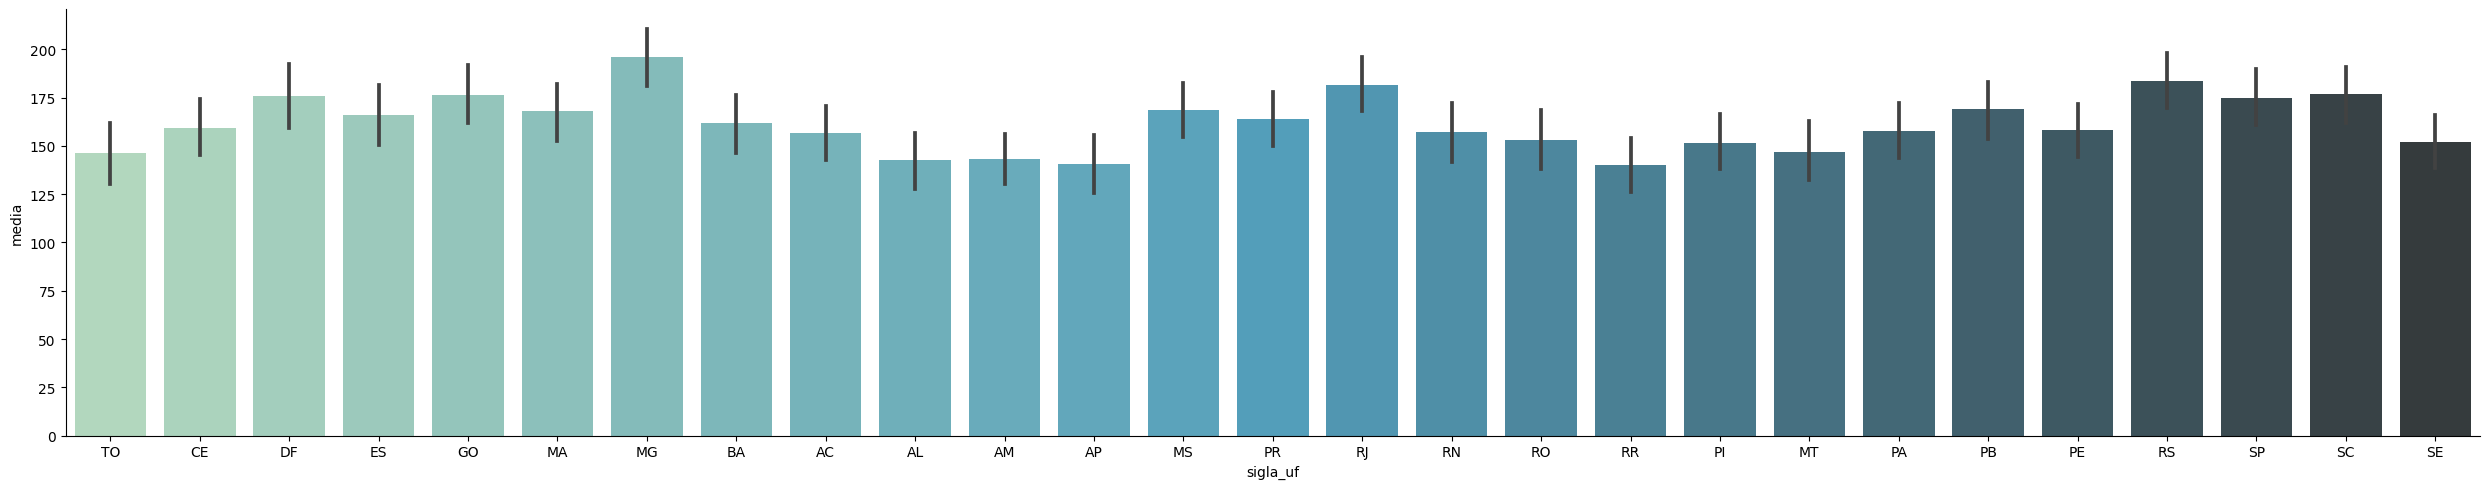

In [242]:
ordem_media_uf = resultado_filtrado_uf.sort_values(by='media', ascending=True)#ordenando as media em ordem crescente
sns.catplot(x = 'sigla_uf', y = "media", kind= "bar", data = ordem_media_uf, aspect = 5,
    palette = "GnBu_d")

###Análise de desempenho dos estados brasileiros

Uma análise dos resultados de testes padronizados no Brasil revela que os estados do norte e nordeste, em geral, apresentam notas mais baixas do que os estados do sul, sudeste e centro-oeste.

Diferenças de investimento

Uma possível explicação para essa diferença de desempenho é a diferença de investimento em educação entre os estados. O Distrito Federal, por exemplo, investe 10.942,86 por aluno, enquanto o Amazonas investe apenas 3.075,89.

Outros fatores

É importante ressaltar que outros fatores também podem contribuir para as diferenças de desempenho entre os estados, como a desigualdade social, a qualidade da infraestrutura escolar e a qualificação dos professores.

O caso do estado do Maranhão:

O estado do Maranhão tem as piores taxas de alfabetização, conclusão do ensino médio e pontuações de testes padronizados do país. Também tem a maior taxa de desemprego, os salários médios mais baixos e as taxas de crescimento econômico mais lentas. Esses dados sugerem que o Maranhão é um dos estados que enfrentam os desafios do baixo rendimento no Brasil.

